# Data Setup

In this notebook, we demonstrate how to:
- setup time series data for this tutorial
- visualize the data

The data in this example is taken from the GEFCom2014 forecasting competition<sup>1</sup>. It consists of 3 years of hourly electricity load and temperature values between 2012 and 2014. 

<sup>1</sup>Tao Hong, Pierre Pinson, Shu Fan, Hamidreza Zareipour, Alberto Troccoli and Rob J. Hyndman, "Probabilistic energy forecasting: Global Energy Forecasting Competition 2014 and beyond", International Journal of Forecasting, vol.32, no.3, pp 896-913, July-September, 2016.

In [1]:
import os
import matplotlib.pyplot as plt
from common.utils import load_data
from common.extract_data import extract_data
%matplotlib inline

Download the data. 

(Note: The following code is designed to run on Azure Notebook. If you are using this notebook in a different environment, you will need to mofidy the code.)

In [ ]:
data_dir = './data'

if not os.path.exists(os.path.join(data_dir, 'energy.csv')):
    # Download and move the zip file
    !wget https://www.dropbox.com/s/pqenrr2mcvl0hk9/GEFCom2014.zip
    !mv GEFCom2014.zip ./data
    # If not done already, extract zipped data and save as csv
    extract_data(data_dir)

Load the data from csv into a Pandas dataframe

In [3]:
energy = load_data(data_dir)[['load']]
energy.head()

,load
2012-01-01 00:00:00,2698.0
2012-01-01 01:00:00,2558.0
2012-01-01 02:00:00,2444.0
2012-01-01 03:00:00,2402.0
2012-01-01 04:00:00,2403.0


Plot all available load data (January 2012 to Dec 2014)

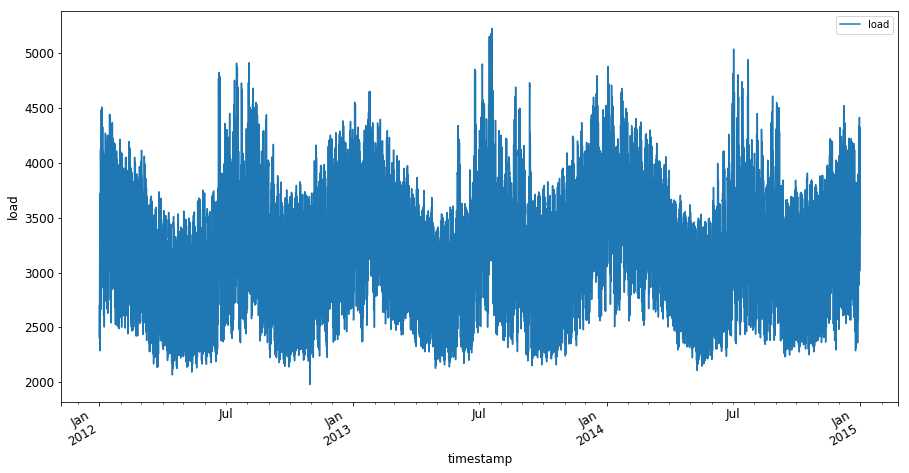

In [4]:
energy.plot(y='load', subplots=True, figsize=(15, 8), fontsize=12)
plt.xlabel('timestamp', fontsize=12)
plt.ylabel('load', fontsize=12)
plt.show()

Plot first week of July 2014

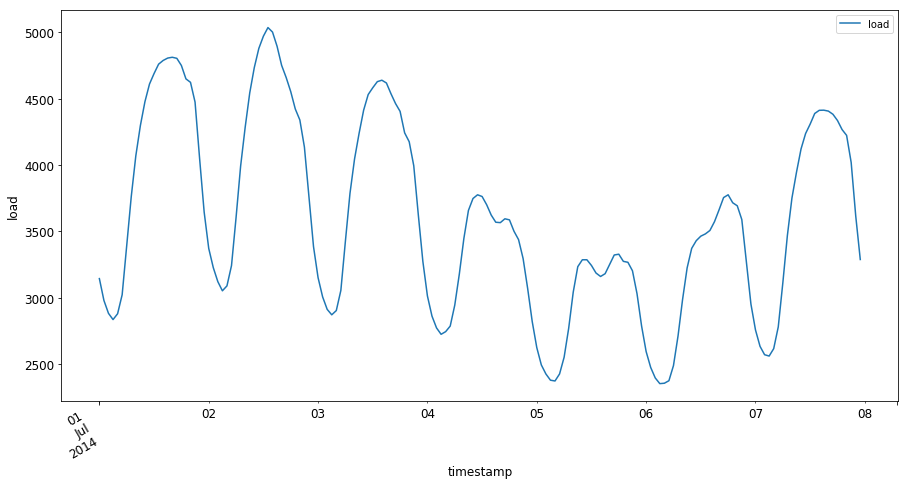

In [5]:
energy['2014-07-01':'2014-07-07'].plot(y='load', subplots=True, figsize=(15, 8), fontsize=12)
plt.xlabel('timestamp', fontsize=12)
plt.ylabel('load', fontsize=12)
plt.show()

If you are able to run this notebook successfully and see all the visualizations, you are ready to move to next step of this tutorial. 